


# DICOM 3D

## Trabajo práctico A

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import glob

> Recuerde **siempre** transformar las CTs a HUs **antes** de empezar a trabajar con ellas:

$$
f_t(x,y) = \texttt{DCM.RescaleSlope} \times f_{orig}(x,y)  + \texttt{DCM.RescaleIntercept}
$$


### 1 Corte sagital

Con la CT de la clase, obtenga una figura con el corte sagital de la tomografía. Tenga en cuenta la relación de aspecto para que la figura se vea proporcional. Use los mismos parámetros de *Window and level* que se usaron el clase.



In [28]:
direct = 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT/*.dcm'

In [29]:
def mando_dicom(directorio):
    archivos = glob.glob(directorio, recursive=False)
    archivos_ordenados = sorted(archivos)
    dicoms = []
    for fname in archivos_ordenados:
        dicoms.append(pydicom.read_file(fname))
    return dicoms

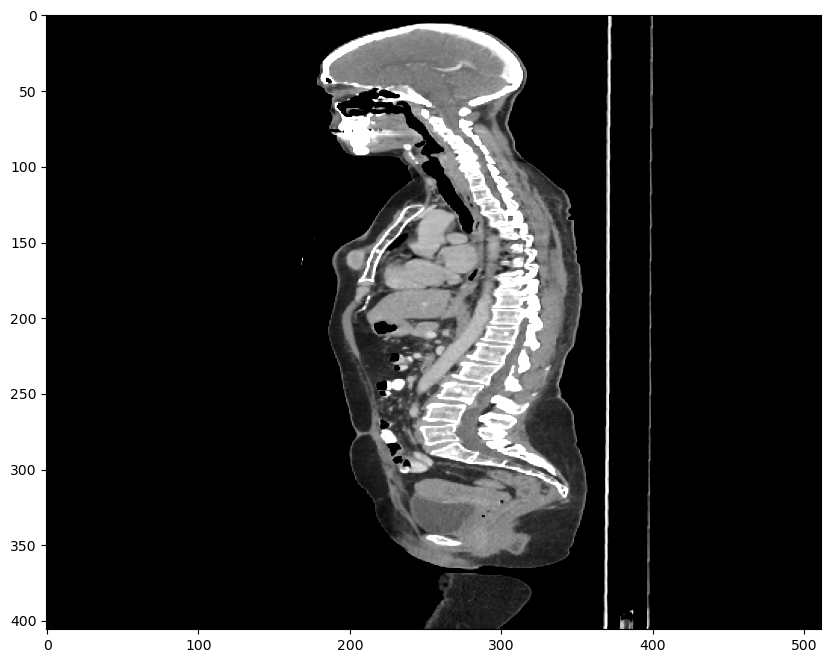

In [30]:
#construyo mi volumen tomográfico
dicoms=mando_dicom(direct)

slice0 = dicoms[0]   # Primer corte, lo uso para recuperar los datos comunes a todos los cortes
vol_shape = list(slice0.pixel_array.shape) # Tamaño de la imagen 2D
vol_shape.append(len(dicoms))
matriz3D = np.zeros(vol_shape)

for i, slice in enumerate(dicoms):

    corte = slice.pixel_array * slice.RescaleSlope + slice.RescaleIntercept
    matriz3D[:, :, i] = corte
    
c = 40
w = 400
ventmax = c + w/2
ventmin = c - w/2


fig_1 = plt.figure(1, figsize=(10,10))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[:, 255, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
plt.show()

### 2 Revisitando `matplotlib`

En las figuras obtenidas en las clases anteriores, los ejes de las mismas están representando el número de pixel (¿Está de acuerdo con esta afirmación?). Sin embargo es útil que dichos ejes representen los tamaños en mm de los cortes tomográficos. Para ello

1. Encuentre la transformación que lleva los ejes tomográficos X e Y de pixeles a mm. Para ello utilice el valor de `PixelSpacing` y tenga en cuenta que el centro del corte tomográfico se encuentra en P = (255,255)

2. Encuentre la transformación que lleva el eje tomográfico Z de pixeles a mm. Para ello utilice el valor de `SliceThickness`. En este caso los valores de Z son absolutos, así que deben respetarse.

3. Use el método `plt.xticks` para agregar los nuevos valores de ejes en mm. A continuación se muestra un ejemplo sencillo de su uso.

In [23]:
#def pixel_to_mm(x, y):
#     return (x * pixel_spacing - 255 * pixel_spacing, y * pixel_spacing - 255 * pixel_spacing)
# Obtener el PixelSpacing
pixel_spacing = dicoms[0].PixelSpacing

# Obtener el SliceThickness
slice_thickness = dicoms[0].SliceThickness

# Convertir las coordenadas de píxeles a coordenadas en mm
def pixel_to_mm(x, y):
    return (x * pixel_spacing - 255 * pixel_spacing, y * pixel_spacing - 255 * pixel_spacing)

# Convertir las coordenadas de Z a coordenadas en mm
def pixel_to_mm_z(z):
    return z * slice_thickness



# Agregar los nuevos valores de ejes a la figura
plt.xticks(np.arange(x_min_mm, x_max_mm, 5))
plt.yticks(np.arange(y_min_mm, y_max_mm, 5))
plt.zticks(np.arange(z_min_mm, z_max_mm, 5))

# Mostrar la figura
plt.show()

KeyError: (0000, 0000)

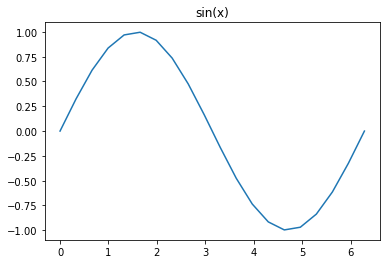

In [3]:
fig_1 = plt.figure(1)
a1 = fig_1.add_subplot(111)

x = np.linspace(0,2*np.pi,20)
y = np.sin(x)

plt.plot(x,y)
a1.set_title('sin(x)')
plt.show()

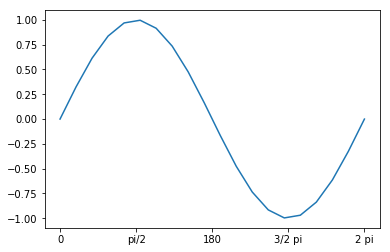

In [6]:
xticks  = [0,np.pi/2,np.pi,3*np.pi/2,2*np.pi] # Defino los nuevos x donde estarán los labels
xlabels = ["0","pi/2","180","3/2 pi","2 pi"]  # Defino los nuevos labels, arreglo del mismo 
                                             # tamaño que xticks
plt.plot(x,y)
plt.xticks(xticks,xlabels)                   # Agrego los nuevos labels al gráfico
a1.set_title('sin(x)')
plt.show()


## 3 Recortando el volumen (Bounding Box)

Como puede verse en la CT que trabajamos, buena parte de la imagen es negra. Por ejemplo, en el corte coronal que vimos en clase, no hay información significativa por fuera del rango (100,400) pixeles en el eje X (aproximadamente). Una operación muy común con estas imágenes es encontrar el *Bounding Box*. 

El *Bounding Box* sería el paralelepípedo que encierra a la parte significativa de la imagen, esto es, a aquel volumen que contiene efectivamente la imagen tomográfica del paciente. Para ello:

1. Cargar la CT como lo hicimos en clase.

2. Para *cada corte tomográfico*, encontrar los valores que encierran la zona significativa de la imagen. Piense primero cómo haría esto, antes de sentarse a programar.

3. Obtenga los máximos y mínimos de los datos obtenidos en 2, que son los que representan el *Bounding Box* en X e Y (¿Por qué?).

4. Grafique el corte coronal de la CT teniendo en cuenta estos valores. Para ello genere un nuevo volumen tomográfico con la imagen recortada.


In [3]:
def bbox(corte,Reverse):
    x=[]
    imagen=corte.pixel_array * corte.RescaleSlope + corte.RescaleIntercept
    vp=imagen[0,0]
    
    if Reverse:
        for i,fila in enumerate(imagen):
            for j,pixel in enumerate (fila):
                if vp!=fila[len(fila)-j]:
                    x.append(len(fila)-j)
    elif():
        for i,fila in enumerate(imagen):
            for j,pixel in enumerate (fila):
                if vp!=pixel:
                    x.append(j)
    
            
    return x

In [6]:
def armado_bbox(corte):
    x_izq=min(bbox(corte,False))
    x_der=max(bbox(corte,True))
    corte_y=corte.T
    y_abajo=min(bbox(corte,False))
    y_arriba=max(bbox(corte,True))
    
    im_nueva=corte[x_izq:x_der, y_abajo:y_arriba]
    return im_nueva